In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [2]:
# 每个概率都是1/6
fair_probs = torch.ones([6]) / 6
# 简单例子方便理解estimates
counts =  multinomial.Multinomial(6, fair_probs).sample((6,))
cum_counts = counts.cumsum(dim=0)
cum_row_counts = cum_counts.cumsum(dim=1)
estimates = cum_counts / cum_counts.sum(dim=1,keepdim=True)
counts,cum_counts,cum_row_counts,estimates

(tensor([[1., 1., 1., 3., 0., 0.],
         [1., 2., 1., 2., 0., 0.],
         [1., 2., 0., 1., 1., 1.],
         [2., 0., 1., 1., 0., 2.],
         [1., 0., 0., 2., 2., 1.],
         [1., 1., 1., 1., 0., 2.]]),
 tensor([[ 1.,  1.,  1.,  3.,  0.,  0.],
         [ 2.,  3.,  2.,  5.,  0.,  0.],
         [ 3.,  5.,  2.,  6.,  1.,  1.],
         [ 5.,  5.,  3.,  7.,  1.,  3.],
         [ 6.,  5.,  3.,  9.,  3.,  4.],
         [ 7.,  6.,  4., 10.,  3.,  6.]]),
 tensor([[ 1.,  2.,  3.,  6.,  6.,  6.],
         [ 2.,  5.,  7., 12., 12., 12.],
         [ 3.,  8., 10., 16., 17., 18.],
         [ 5., 10., 13., 20., 21., 24.],
         [ 6., 11., 14., 23., 26., 30.],
         [ 7., 13., 17., 27., 30., 36.]]),
 tensor([[0.1667, 0.1667, 0.1667, 0.5000, 0.0000, 0.0000],
         [0.1667, 0.2500, 0.1667, 0.4167, 0.0000, 0.0000],
         [0.1667, 0.2778, 0.1111, 0.3333, 0.0556, 0.0556],
         [0.2083, 0.2083, 0.1250, 0.2917, 0.0417, 0.1250],
         [0.2000, 0.1667, 0.1000, 0.3000, 0.1000, 0.1333

In [3]:
# 模拟1000次抛骰子
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1640, 0.1690, 0.1740, 0.1600, 0.1620, 0.1710])

In [4]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
# dim=0，是竖着累计，穿刺行向量
# dim=1，是横着累计，穿刺列向量
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1,keepdim=True)

counts,cum_counts,estimates

(tensor([[3., 2., 0., 2., 2., 1.],
         [6., 0., 1., 1., 1., 1.],
         [3., 2., 1., 0., 2., 2.],
         ...,
         [2., 2., 0., 1., 1., 4.],
         [6., 1., 1., 1., 1., 0.],
         [2., 1., 1., 2., 1., 3.]]),
 tensor([[  3.,   2.,   0.,   2.,   2.,   1.],
         [  9.,   2.,   1.,   3.,   3.,   2.],
         [ 12.,   4.,   2.,   3.,   5.,   4.],
         ...,
         [870., 834., 790., 842., 799., 845.],
         [876., 835., 791., 843., 800., 845.],
         [878., 836., 792., 845., 801., 848.]]),
 tensor([[0.3000, 0.2000, 0.0000, 0.2000, 0.2000, 0.1000],
         [0.4500, 0.1000, 0.0500, 0.1500, 0.1500, 0.1000],
         [0.4000, 0.1333, 0.0667, 0.1000, 0.1667, 0.1333],
         ...,
         [0.1747, 0.1675, 0.1586, 0.1691, 0.1604, 0.1697],
         [0.1756, 0.1673, 0.1585, 0.1689, 0.1603, 0.1693],
         [0.1756, 0.1672, 0.1584, 0.1690, 0.1602, 0.1696]]))

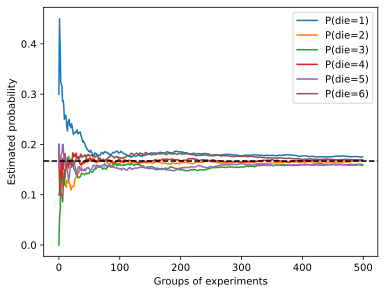

In [5]:
d2l.set_figsize((6,4.5))
# numpy()转换成np数组dfloat32
for i in range(6):
    # 传入数据
    d2l.plt.plot(estimates[:,i].numpy(),
                label=("P(die="+str(i+1)+")"))
# 绘制平行于x轴的水平参考线
d2l.plt.axhline(y=0.167,color="black",linestyle='dashed')
# 设置label
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
# plt.legend( )创建图例，比plt.show()功能多一点
d2l.plt.legend()